In [1]:
from tslearn.datasets import UCR_UEA_datasets
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from ClassificationModels.ResNet import Classifier_RESNET
from ClassificationModels.CNN import Classifier_CNN
import tensorflow as tf

2023-06-14 09:10:04.860948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 09:10:06.200602: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-14 09:10:06.200708: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-14 09:10:06.200719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

# Parameters

In [2]:
dataset='ElectricDevices'

# Load Data

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [4]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Load Model

In [5]:

import tensorflow as tf 
model = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

2023-06-14 09:10:10.787128: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-14 09:10:10.787156: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-14 09:10:10.787179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jacqueline-ThinkPad-P53): /proc/driver/nvidia/version does not exist
2023-06-14 09:10:10.787364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Explanation Algo

In [6]:
item=test_x[10].reshape(1,-1,1)
shape=item.shape
y_target= model.predict(item)

1/1 [==============================] - 0s 189ms/step


In [7]:
print(y_target)

[[6.5272084e-06 1.0916962e-18 2.0263034e-11 1.5986618e-07 8.7627843e-03
  1.0000000e+00 1.8584505e-08]]


In [8]:
from TSInterpret.InterpretabilityModels.counterfactual.NativeGuideCF import NativeGuideCF
exp_model=NativeGuideCF(model,(train_x,train_y), backend='TF', mode = 'time',method='NUN_CF')

(96, 1)
279/279 [==============================] - 1s 3ms/step


In [9]:
exp,label=exp_model.explain(item, np.argmax(y_target,axis=1))

(1, 1, 96)
[5]
1/1 [==============================] - 0s 50ms/step
average_pooling1d_1
1/1 [==============================] - 0s 87ms/step


# Plot Item 

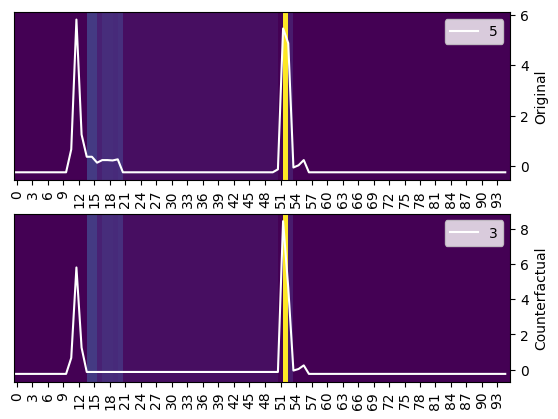

In [10]:
%matplotlib inline
exp_model.plot(item.reshape(-1),np.argmax(y_target,axis=1)[0],exp.reshape(-1),label)

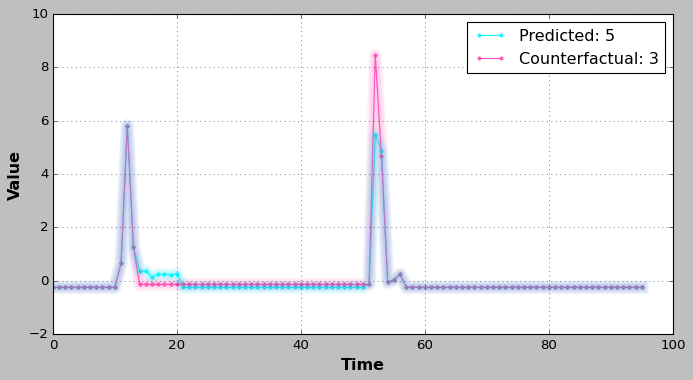

In [11]:
%matplotlib inline
exp_model.plot_in_one(item,np.argmax(y_target,axis=1)[0],exp,label)